Pada kasus kali ini tersedia sebuah dataset yang berkaitan dengan pasien penderita hepatitis. Dataset tersebut tersedia di dalam file dalam format H5 (hepatitis.h5) dengan key bernama "dataset". Di dalam dataset tersebut terdapat 11 atribut sebagai berikut:

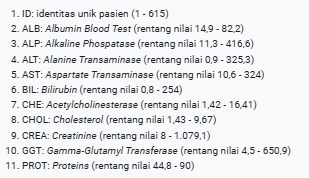

Tugas Anda adalah mengklasterisasi 615 data pasien hepatitis tersebut ke dalam beberapa klaster menggunakan metode K-Means Clustering. Anda harus mencari tahu sendiri berapa jumlah klaster paling optimal untuk kasus ini. Setelah menemukan jumlah klaster paling optimal, lakukan evaluasi terhadap kualitas klaster tersebut dengan suatu metrik evaluasi klasterisasi yang Anda pahami.

Selanjutnya simpan kembali hasil klasterisasi dataset tersebut ke file hepatitis.h5 dengan key bernama "clustering". Hasil klasterisasi tentunya sudah dilengkapi dengan label yang menunjukkan ke klaster mana saja setiap data dikelompokkan. Dengan demikian data hasil klasterisasi yang Anda simpan akan memiliki atribut tambahan yang berisi label tersebut.

**Memvisualisasikan DataFrame**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as py
import h5py
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler


# Buka file H5
with h5py.File('/content/drive/MyDrive/Sistem Pendukung Keputusan/hepatitis.h5', 'r') as file:
    # Ambil data dari atribut 'block0_items' (kolom) dan 'block0_values' (nilai data)
    column_names = [name.decode() for name in file['dataset']['block0_items'][:]]  # Decode bytes to strings
    data_values = file['dataset']['block0_values'][:]

    # Buat DataFrame pandas untuk menampilkan tabel
    df = pd.DataFrame(data_values, columns=column_names)

# Tampilkan tabel
df

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...
610,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


**Mencoba Melihat Jumlah Klasterisasi Terbaik menggunakan Elbow Methode dengan melihat titik Siku ada**

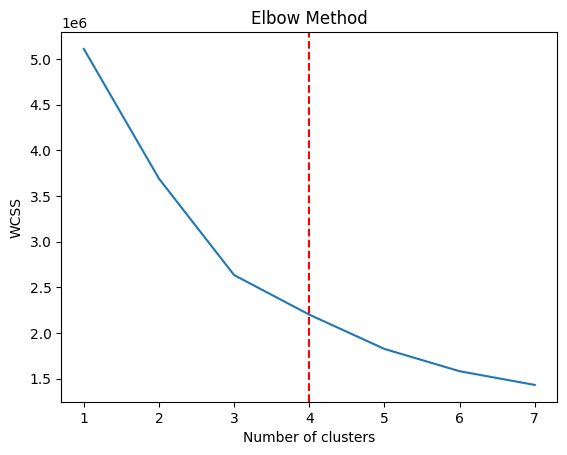

In [ ]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x=4, color='r', linestyle='--')
plt.show()

**Dari Elbow Methode kemungkinan jumlah klasterisasi terbaik yaitu 4**

mencoba melakukan klassterisasi mulai dari 2 sampai 8 total klasterisasi dan  dievaluasi menggunakan silhouette score dan diambil score yang paling tinggi

In [ ]:

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Rentang nilai k yang ingin dicoba
k_values = range(2, 11)

# Menyimpan skor untuk setiap metrik
results = []

# Iterasi untuk setiap nilai k
for k in k_values:
    # Inisialisasi dan latih model KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df)

    # Hitung skor untuk setiap metrik
    silhouette = silhouette_score(df, cluster_labels)
    davies_bouldin = davies_bouldin_score(df, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(df, cluster_labels)

    # Simpan hasil dalam list
    results.append([k, silhouette, davies_bouldin, calinski_harabasz])

# Membuat dataframe dari hasil
results_df = pd.DataFrame(results, columns=['k', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])

# Menampilkan tabel
display(results_df)

best_k_silhouette = results_df.loc[results_df['Silhouette Score'].idxmax(), 'k']
best_k_davies_bouldin = results_df.loc[results_df['Davies-Bouldin Index'].idxmin(), 'k']
best_k_calinski_harabasz = results_df.loc[results_df['Calinski-Harabasz Index'].idxmax(), 'k']
best_k = best_k_silhouette

print("\nNilai k terbaik:")
print(f"  Silhouette Score: {best_k_silhouette}")
print(f"  Davies-Bouldin Index: {best_k_davies_bouldin}")
print(f"  Calinski-Harabasz Index: {best_k_calinski_harabasz}")

,k,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,2,0.821326,0.612346,206.707144
1,3,0.824885,0.464756,249.335488
2,4,0.830017,0.454791,226.377913
3,5,0.603242,0.803241,273.256400
4,6,0.496302,0.897211,271.222433
5,7,0.503274,0.797345,259.946877
6,8,0.382536,0.959975,248.372649
7,9,0.199547,1.063187,242.332052
8,10,0.212673,1.070181,231.203691



Nilai k terbaik:
  Silhouette Score: 4
  Davies-Bouldin Index: 4
  Calinski-Harabasz Index: 5


**Klasterisasi Terbaik yaitu ditunjukkan dengan jumlah 4 Klasterisasi**

Disimpulkan percobaan dari k=2 sampai k=8 dengan melihat hasil dari beberapa metode evaluasi hasil klasterisasi

**Hasil DataFrame yang sudah ada kolom *Cluster***

In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=0)
df['cluster'] = kmeans.fit_predict(df)

df['cluster'] = df['cluster'] + 1
df

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1
...,...,...,...,...,...,...,...,...,...,...,...
610,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,2
611,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


**Menyimpan Hasil DataFrame ke file hepatitis.h5  dengan key bernama "clustering"**

In [ ]:
with h5py.File('/content/drive/MyDrive/Sistem Pendukung Keputusan/hepatitis.h5', 'a') as file:
    # Periksa apakah key 'clustering' sudah ada
    if 'clustering' not in file:
        # Buat dataset baru dengan key 'clustering' jika belum ada
        dset = file.create_dataset('clustering', data=df.to_numpy())

        # Simpan nama kolom sebagai atribut
        dset.attrs['column_names'] = [name.encode() for name in df.columns]
    else:
        print("Key 'clustering' sudah ada dalam file.")

Key 'clustering' sudah ada dalam file.


In [ ]:
with h5py.File('/content/drive/MyDrive/Sistem Pendukung Keputusan/hepatitis.h5', 'r') as file:
    # Cetak key yang tersedia
    print("Key yang tersedia:", list(file.keys()))

Key yang tersedia: ['clustering', 'dataset']


**Menambahkan Data Baru**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data baru yang akan diklasifikasikan
new_df = pd.DataFrame({
    'ID': [701, 702, 703, 704, 705, 706, 707, 708, 709, 710],
    'ALB': [50, 51, 74, 26, 60, 44, 65, 41, 69, 74],
    'ALP': [212, 193, 216, 356, 31, 64, 278, 295, 257, 298],
    'ALT': [301, 99, 133, 309, 30, 153, 296, 138, 79, 50],
    'AST': [22, 214, 210, 288, 100, 171, 163, 34, 116, 38],
    'BIL': [217, 37, 115, 137, 71, 177, 172, 106, 240, 181],
    'CHE': [2, 2, 4, 5, 2, 12, 10, 4, 13, 4],
    'CHOL': [2, 6, 7, 6, 4, 5, 8, 4, 4, 5],
    'CREA': [760, 239, 517, 779, 200, 612, 558, 435, 427, 683],
    'GGT': [292, 427, 97, 27, 405, 43, 293, 579, 180, 300],
    'PROT': [80, 87, 87, 47, 86, 78, 77, 59, 63, 78]
})

new_df

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1
1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1
2,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1
3,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1
4,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1
...,...,...,...,...,...,...,...,...,...,...,...
610,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,2
611,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(df.drop('cluster', axis=1), df['cluster'])

# Prediksi label cluster untuk data baru
new_df['predicted_cluster'] = knn.predict(new_df.drop('ID', axis=1))

# Menampilkan data baru dengan prediksi cluster
display(new_df)

,ID,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,predicted_cluster
0,701,50,212,301,22,217,2,2,760,292,80,4
1,702,51,193,99,214,37,2,6,239,427,87,2
2,703,74,216,133,210,115,4,7,517,97,87,1
3,704,26,356,309,288,137,5,6,779,27,47,4
4,705,60,31,30,100,71,2,4,200,405,86,2
5,706,44,64,153,171,177,12,5,612,43,78,1
6,707,65,278,296,163,172,10,8,558,293,77,2
7,708,41,295,138,34,106,4,4,435,579,59,2
8,709,69,257,79,116,240,13,4,427,180,63,1
9,710,74,298,50,38,181,4,5,683,300,78,4


In [ ]:
with h5py.File('/content/drive/MyDrive/Sistem Pendukung Keputusan/hepatitis.h5', 'a') as file:
    # Periksa apakah key 'classification' sudah ada
    if 'classification' not in file:
        # Buat dataset baru dengan key 'classification' jika belum ada
        dset = file.create_dataset('classification', data=df.to_numpy())

        # Simpan nama kolom sebagai atribut
        dset.attrs['column_names'] = [name.encode() for name in df.columns]
    else:
        print("Key 'classification' sudah ada dalam file.")

In [ ]:
with h5py.File('/content/drive/MyDrive/Sistem Pendukung Keputusan/hepatitis.h5', 'r') as file:
    # Cetak key yang tersedia
    print("Key yang tersedia:", list(file.keys()))

Key yang tersedia: ['classification', 'clustering', 'dataset']
